# Basic analysis of training set demographics
Calculate exact numbers to report in paper.

In [1]:
from pathlib import Path

import pandas as pd
import seaborn as sns

BUCKEYE_DATA_PATH = Path("../../data/buckeye")
TRAIN_METADATA = BUCKEYE_DATA_PATH / "train/metadata.csv"
VAL_METADATA = BUCKEYE_DATA_PATH / "validation/metadata.csv"
TEST_METADATA = BUCKEYE_DATA_PATH / "test/metadata.csv"
GENDER_COL = "speaker_gender"
AGE_RANGE_COL = "speaker_age_range"


In [2]:
train_df = pd.read_csv(TRAIN_METADATA)
train_df.head()

,utterance_id,duration,buckeye_transcript,text,ipa,speaker_id,speaker_gender,speaker_age_range,interviewer_gender,file_path,file_name
0,s0101a_Utt1,0.405470,k ay,okay,k aɪ,S01,f,y,f,data/buckeye/train/s0101a_Utt1.wav,s0101a_Utt1.wav
1,s0101a_Utt2,0.328852,U ah m,VOCNOISE um,ʌ m,S01,f,y,f,data/buckeye/train/s0101a_Utt2.wav,s0101a_Utt2.wav
2,s0101a_Utt3,8.351466,ay m U U U l ah v d ih n k l ah b ah s m ay eh...,i'm EXCLUDE-name VOCNOISE EXT-I've lived in co...,aɪ m l ʌ v d ɪ n k l ʌ b ʌ s m aɪ ɛ n t ɛ ɹ l ...,S01,f,y,f,data/buckeye/train/s0101a_Utt3.wav,s0101a_Utt3.wav
3,s0101a_Utt4,5.703705,ah m ay m ey ah m U ih s k ah nx ah v ey y ih ...,um i'm a um VOCNOISE it's kind of a unique pos...,ʌ m aɪ m eɪ ʌ m ɪ s k ʌ ɾ̃ ʌ v eɪ j ɪ n i k p ...,S01,f,y,f,data/buckeye/train/s0101a_Utt4.wav,s0101a_Utt4.wav
4,s0101a_Utt5,2.659855,m ay U jh aa b t ay dx el ah z uh s iy n y er ...,my VOCNOISE job title is a senior research ass...,m aɪ dʒ ɑ b t aɪ ɾ l̩ ʌ z ʊ s i n j ɹ̩ ɹ i s ...,S01,f,y,f,data/buckeye/train/s0101a_Utt5.wav,s0101a_Utt5.wav


In [3]:
print("Total samples:", len(train_df))

Total samples: 18782


In [4]:
# Only samples with length < 12 seconds and > 0.1 seconds are eligible
train_eligible_df = train_df[(train_df["duration"] < 12) & (train_df["duration"] >= 0.1)]
print("Total samples eligible:", len(train_eligible_df))
print("Avg duration of train eligible utterances:", train_eligible_df["duration"].mean())
print("Stddev duration of train eligible utterances:", train_eligible_df["duration"].std())

Total samples eligible: 18344
Avg duration of train eligible utterances: 2.73786290694505
Stddev duration of train eligible utterances: 3.0368868268589857


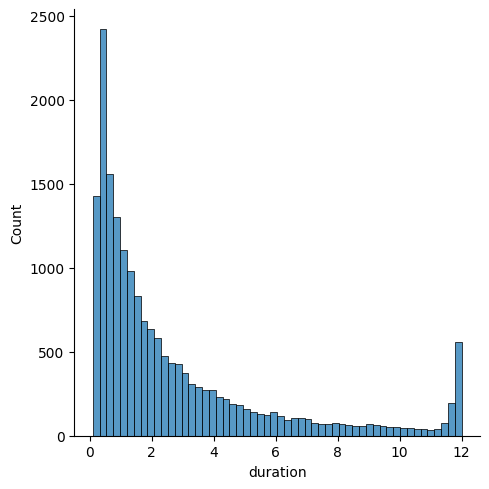

In [5]:
sns.displot(data=train_eligible_df, x="duration")

In [6]:
def display_group_stats(dataframe, groupby_key):
    display(dataframe.groupby(groupby_key).agg(
        num_samples = pd.NamedAgg(column="utterance_id", aggfunc="nunique"),
        total_time = pd.NamedAgg(column="duration", aggfunc="sum")
    ))

In [7]:
display_group_stats(train_eligible_df, GENDER_COL)

,num_samples,total_time
speaker_gender,,
f,8252,24701.719752
m,10092,25521.637413


In [8]:
display_group_stats(train_eligible_df, AGE_RANGE_COL)

,num_samples,total_time
speaker_age_range,,
o,9232,26544.650167
y,9112,23678.706998


In [9]:
val_df = pd.read_csv(VAL_METADATA)
print("Val size:", len(val_df))

Val size: 5605


In [10]:
val_eligible_df = val_df[val_df["duration"] < 12]
print("Val eligible size:", len(val_eligible_df))

Val eligible size: 5522


In [11]:
display_group_stats(val_eligible_df, GENDER_COL)

,num_samples,total_time
speaker_gender,,
f,2857,6933.112000
m,2665,8017.774931


In [12]:
display_group_stats(val_eligible_df, AGE_RANGE_COL)

,num_samples,total_time
speaker_age_range,,
o,3052,8226.353625
y,2470,6724.533306


In [13]:
test_df = pd.read_csv(TEST_METADATA)
print("Test size:", len(test_df))

Test size: 5079


In [14]:
source_key = "source"
train_eligible_df[source_key] = "train"
val_eligible_df[source_key] = "validation"
test_df[source_key] = "test"
full_df = pd.concat([train_eligible_df, val_eligible_df, test_df])
print("Full size:", len(full_df))

Full size: 28945


/var/folders/7c/4fzv15450s1bt_03bv1b6hb80000gn/T/ipykernel_10465/3184340750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_eligible_df[source_key] = "train"
/var/folders/7c/4fzv15450s1bt_03bv1b6hb80000gn/T/ipykernel_10465/3184340750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_eligible_df[source_key] = "validation"


In [15]:
full_df.groupby(source_key).count()

,utterance_id,duration,buckeye_transcript,text,ipa,speaker_id,speaker_gender,speaker_age_range,interviewer_gender,file_path,file_name
source,,,,,,,,,,,
test,5079,5079,5079,5079,5079,5079,5079,5079,5079,5079,5079
train,18344,18344,18344,18344,18344,18344,18344,18344,18344,18344,18344
validation,5522,5522,5522,5522,5522,5522,5522,5522,5522,5522,5522


In [16]:
full_df.groupby([source_key, GENDER_COL, AGE_RANGE_COL]).agg(
    num_samples = pd.NamedAgg(column="utterance_id", aggfunc="nunique"),
    total_time = pd.NamedAgg(column="duration", aggfunc="sum")
)

num_samples    total_time
source     speaker_gender speaker_age_range                           
test       f              o                         1712   4708.689814
                          y                         1132   4098.103966
           m              o                          982   4444.142214
                          y                         1253   4767.584917
train      f              o                         4538  13043.311088
                          y                         3714  11658.408664
           m              o                         4694  13501.339079
                          y                         5398  12020.298334
validation f              o                         1670   3500.771742
                          y                         1187   3432.340258
           m              o                         1382   4725.581883
                          y                         1283   3292.193048